In [1]:
import xarray as xr
import functions.eddy_feedback as ef
import numpy as np
import glob

# MODELS HAVE ALREADY BEEN REMOVED

r125 and r126 have been removed from store. Had-LL now has 197 members.

In [2]:
import re

def extract_label(filename):
    """
    Extracts the ensemble member label (e.g. 'r9i1p1f1') from the given filename.
    """
    match = re.search(r'(r\d+)i\d+p\d+f\d+', filename)
    if match:
        return match.group(1)
    else:
        raise ValueError(f"No ensemble label found in filename: {filename}")

In [3]:
path = '/home/links/ct715/data_storage/PAMIP/processed_daily/daily_efp_mon-avg/HadGEM3-GC31-LL'
files = sorted(glob.glob(f"{path}/*.nc"))
ds = xr.open_mfdataset(files, concat_dim='ens_ax', combine='nested')
ds = ds.assign_coords(ens_ax=[extract_label(f) for f in files])
ds

<xarray.Dataset> Size: 5GB
Dimensions:  (ens_ax: 197, time: 11, level: 19, lat: 145, lon: 192)
Coordinates:
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float32 580B -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * level    (level) float32 76B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
  * time     (time) object 88B 2000-06-01 00:00:00 ... 2001-04-01 00:00:00
  * ens_ax   (ens_ax) <U4 3kB 'r100' 'r101' 'r102' 'r103' ... 'r98' 'r99' 'r9'
Data variables:
    u        (ens_ax, time, level, lat, lon) float32 5GB dask.array<chunksize=(1, 11, 19, 145, 192), meta=np.ndarray>
    epfy     (ens_ax, time, level, lat) float32 24MB dask.array<chunksize=(1, 11, 19, 145), meta=np.ndarray>
    divFy    (ens_ax, time, level, lat) float32 24MB dask.array<chunksize=(1, 11, 19, 145), meta=np.ndarray>
    ubar     (ens_ax, time, level, lat) float32 24MB dask.array<chunksize=(1, 11, 19, 145), meta=np.ndarray>

In [4]:
ds = ds.where(ds.level < 1000.) 

print(ef.calculate_efp(ds, data_type='pamip', calc_south_hemis=False))
print(ef.calculate_efp(ds, data_type='pamip', calc_south_hemis=True))

0.1735
0.1729


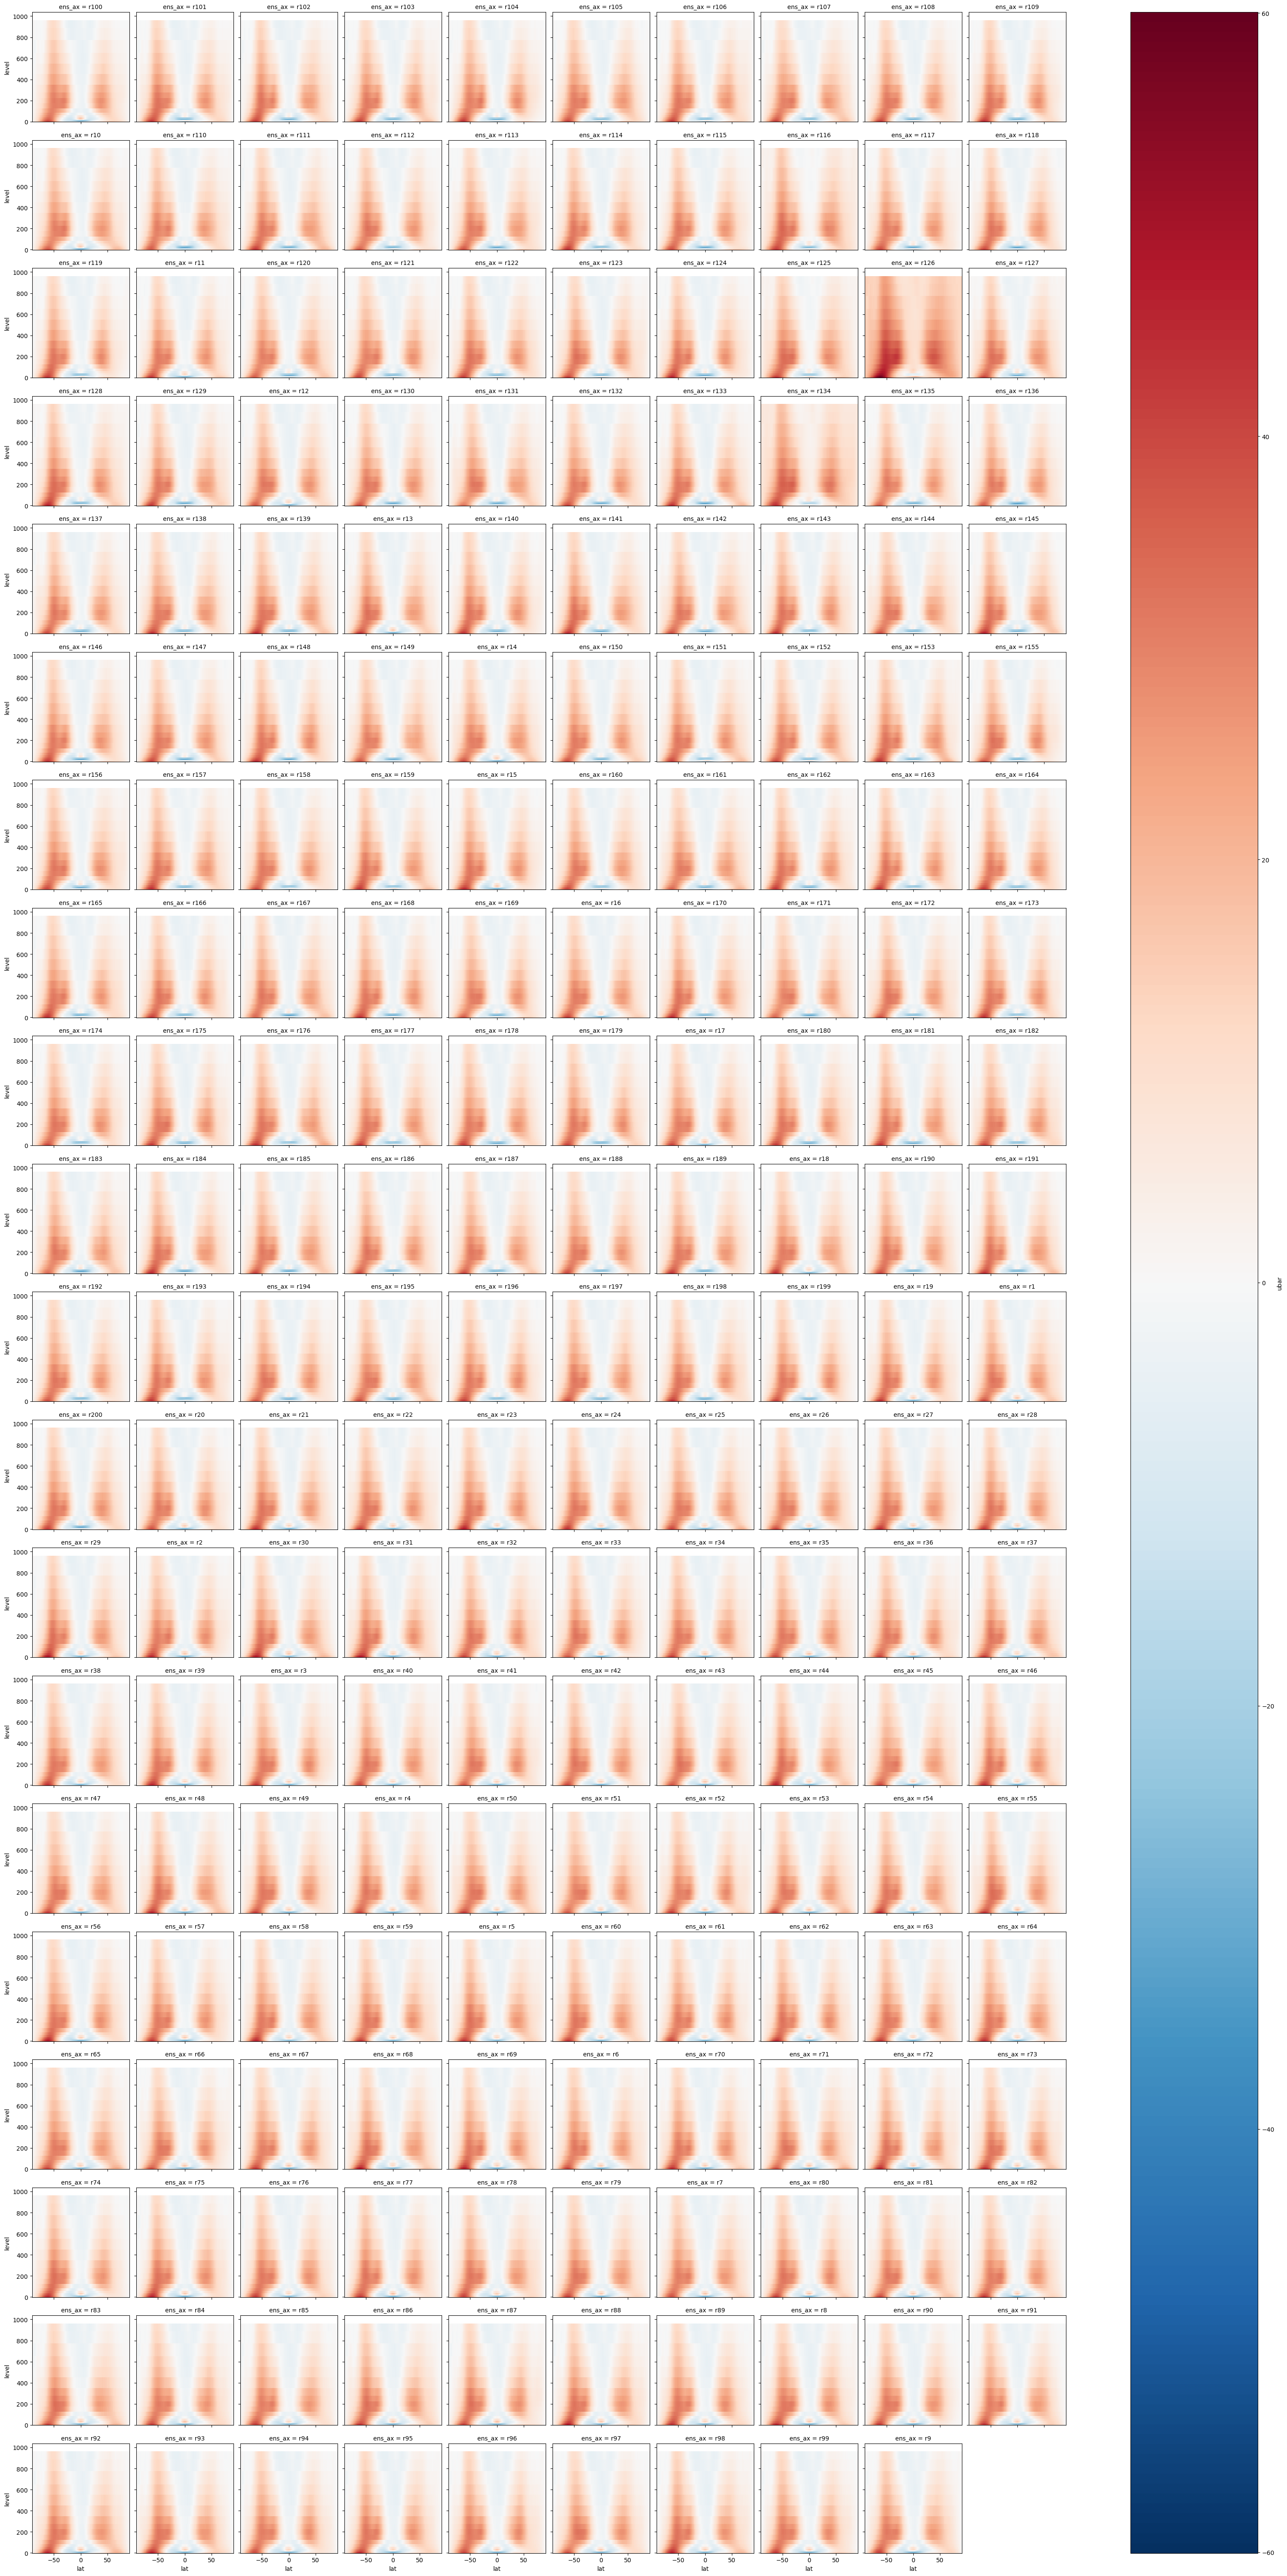

In [33]:
ds.ubar.mean(dim='time').plot(col='ens_ax', col_wrap=10)

# REMOVING FILES

## r126

In [34]:
members = [m for m in ds.ens_ax.values if m not in ['r126']]
ds2 = ds.sel(ens_ax=members)
ds2

<xarray.Dataset> Size: 5GB
Dimensions:  (ens_ax: 198, time: 11, level: 19, lat: 145, lon: 192)
Coordinates:
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float32 580B -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * level    (level) float32 76B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
  * time     (time) object 88B 2000-06-01 00:00:00 ... 2001-04-01 00:00:00
  * ens_ax   (ens_ax) <U4 3kB 'r100' 'r101' 'r102' 'r103' ... 'r98' 'r99' 'r9'
Data variables:
    u        (ens_ax, time, level, lat, lon) float32 5GB dask.array<chunksize=(1, 11, 19, 145, 192), meta=np.ndarray>
    epfy     (ens_ax, time, level, lat) float32 24MB dask.array<chunksize=(1, 11, 19, 145), meta=np.ndarray>
    divFy    (ens_ax, time, level, lat) float32 24MB dask.array<chunksize=(1, 11, 19, 145), meta=np.ndarray>
    ubar     (ens_ax, time, level, lat) float32 24MB dask.array<chunksize=(1, 11, 19, 145), meta=np.ndarray>

In [35]:
print(ef.calculate_efp(ds2, data_type='pamip', calc_south_hemis=False))
print(ef.calculate_efp(ds2, data_type='pamip', calc_south_hemis=True))

0.1479
0.1732


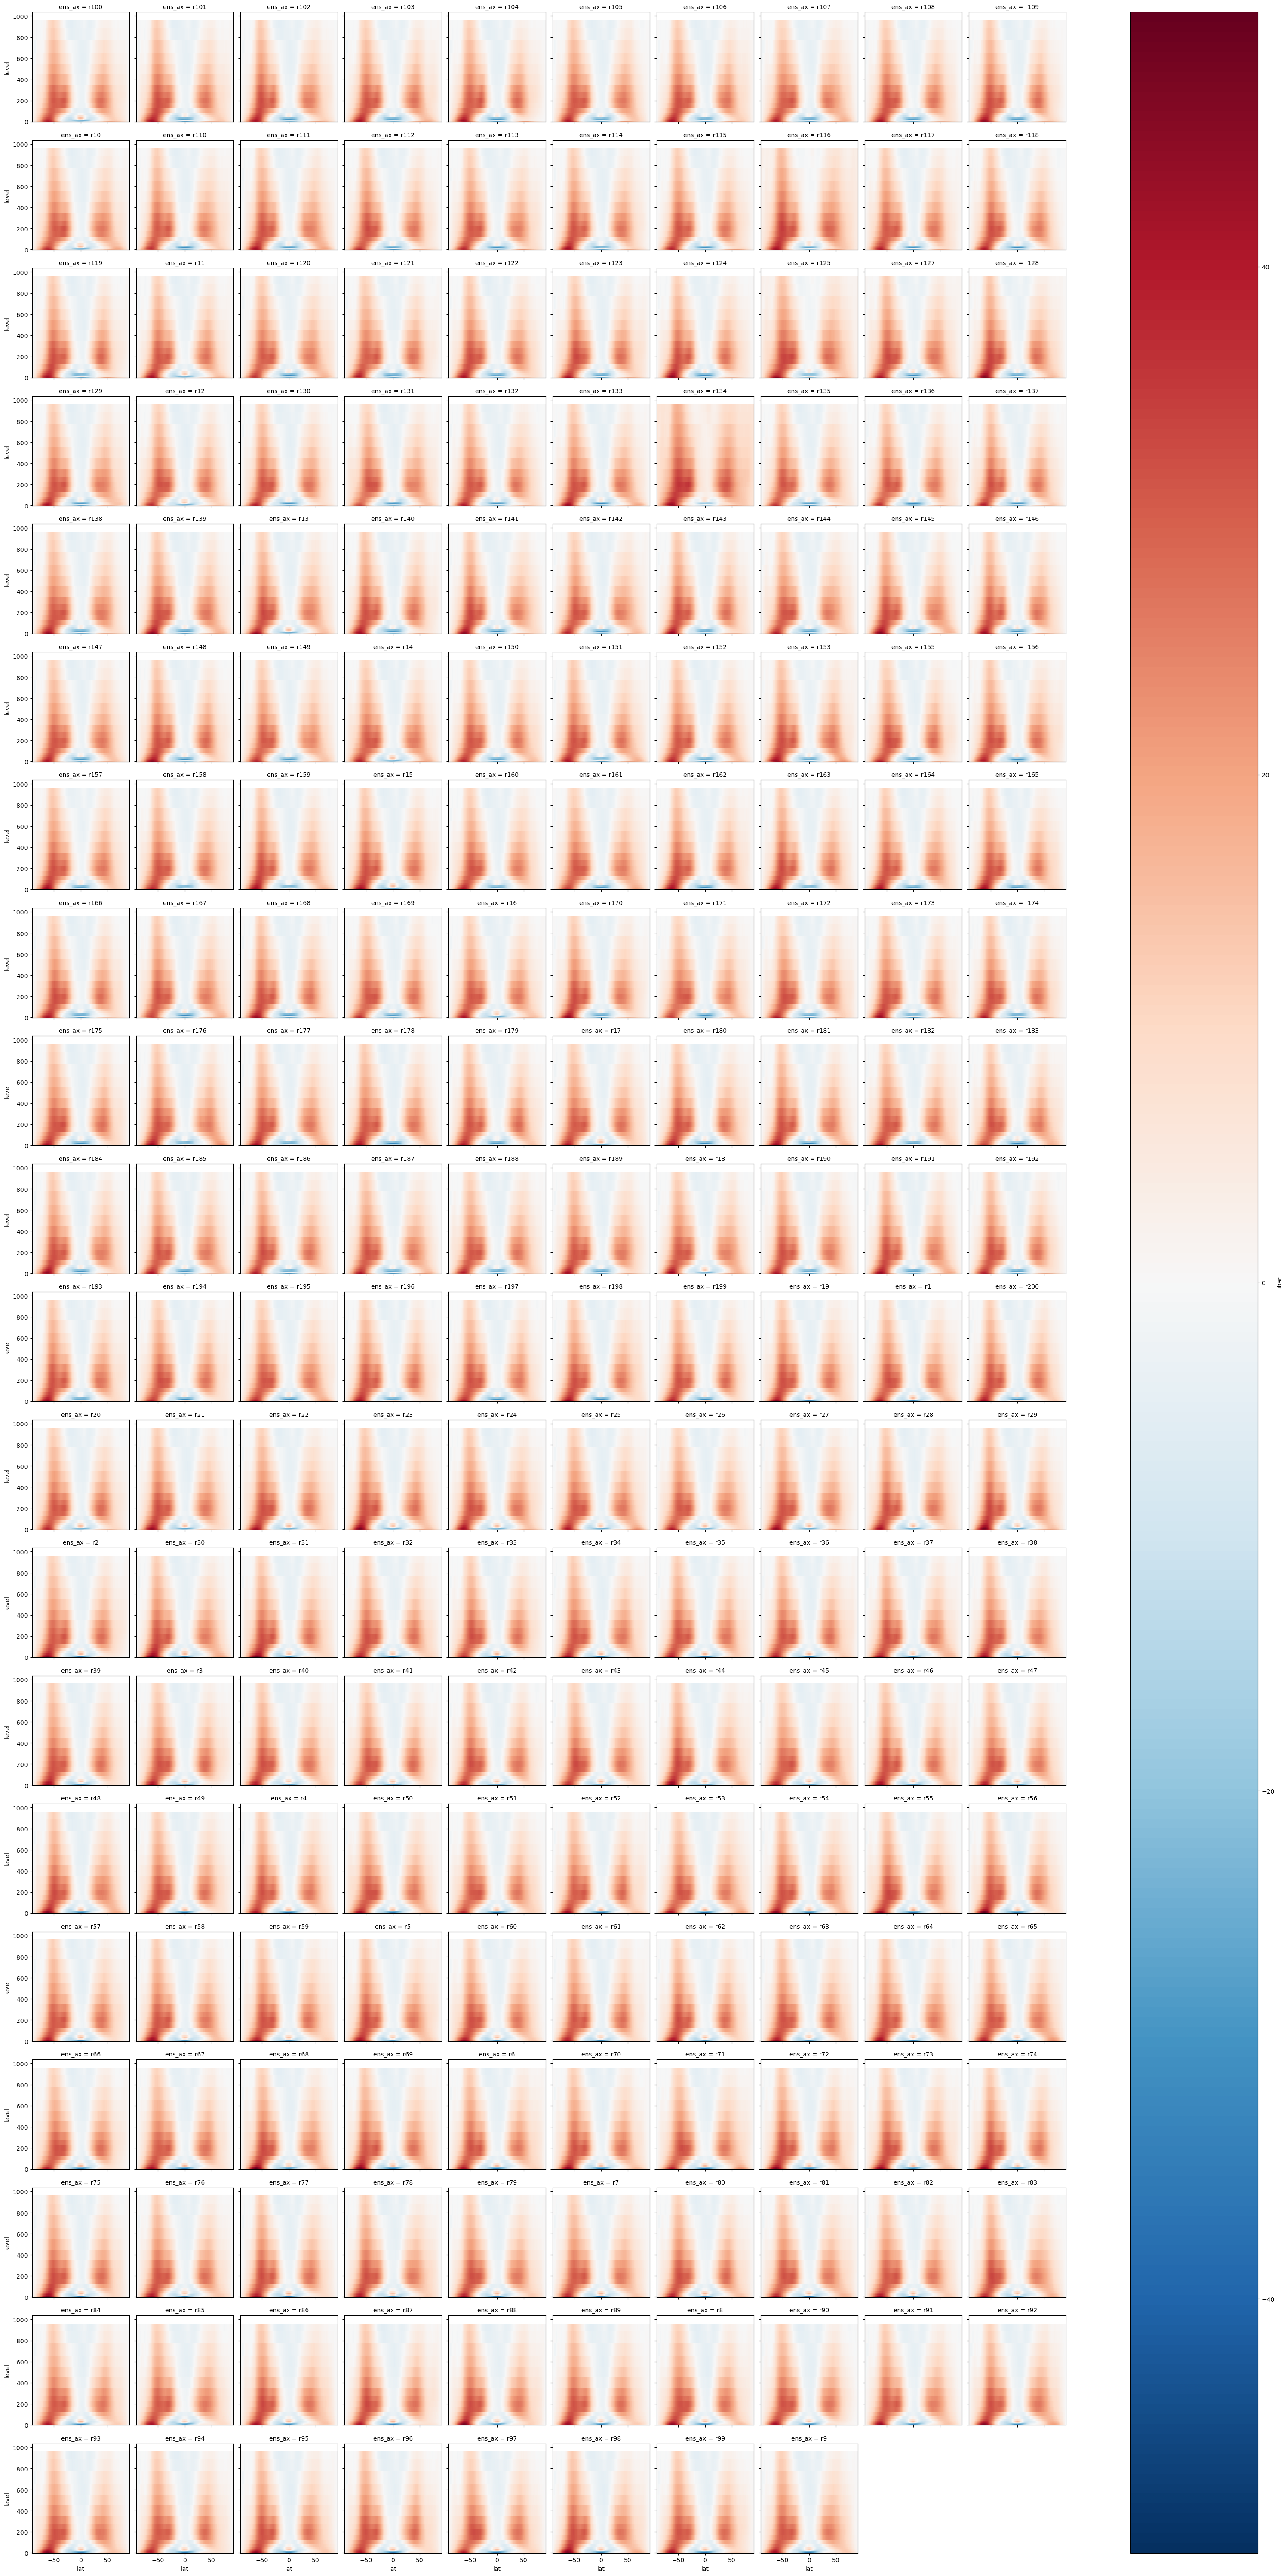

In [36]:
ds2.ubar.mean(dim='time').plot(col='ens_ax', col_wrap=10)

## r125

In [43]:
members = [m for m in ds2.ens_ax.values if m not in ['r125']]
ds3 = ds2.sel(ens_ax=members)
ds3

<xarray.Dataset> Size: 5GB
Dimensions:  (ens_ax: 197, time: 11, level: 19, lat: 145, lon: 192)
Coordinates:
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float32 580B -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * level    (level) float32 76B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
  * time     (time) object 88B 2000-06-01 00:00:00 ... 2001-04-01 00:00:00
  * ens_ax   (ens_ax) <U4 3kB 'r100' 'r101' 'r102' 'r103' ... 'r98' 'r99' 'r9'
Data variables:
    u        (ens_ax, time, level, lat, lon) float32 5GB dask.array<chunksize=(1, 11, 19, 145, 192), meta=np.ndarray>
    epfy     (ens_ax, time, level, lat) float32 24MB dask.array<chunksize=(1, 11, 19, 145), meta=np.ndarray>
    divFy    (ens_ax, time, level, lat) float32 24MB dask.array<chunksize=(1, 11, 19, 145), meta=np.ndarray>
    ubar     (ens_ax, time, level, lat) float32 24MB dask.array<chunksize=(1, 11, 19, 145), meta=np.ndarray>

In [44]:
print(ef.calculate_efp(ds3, data_type='pamip', calc_south_hemis=False))
print(ef.calculate_efp(ds3, data_type='pamip', calc_south_hemis=True))

0.1735
0.1729


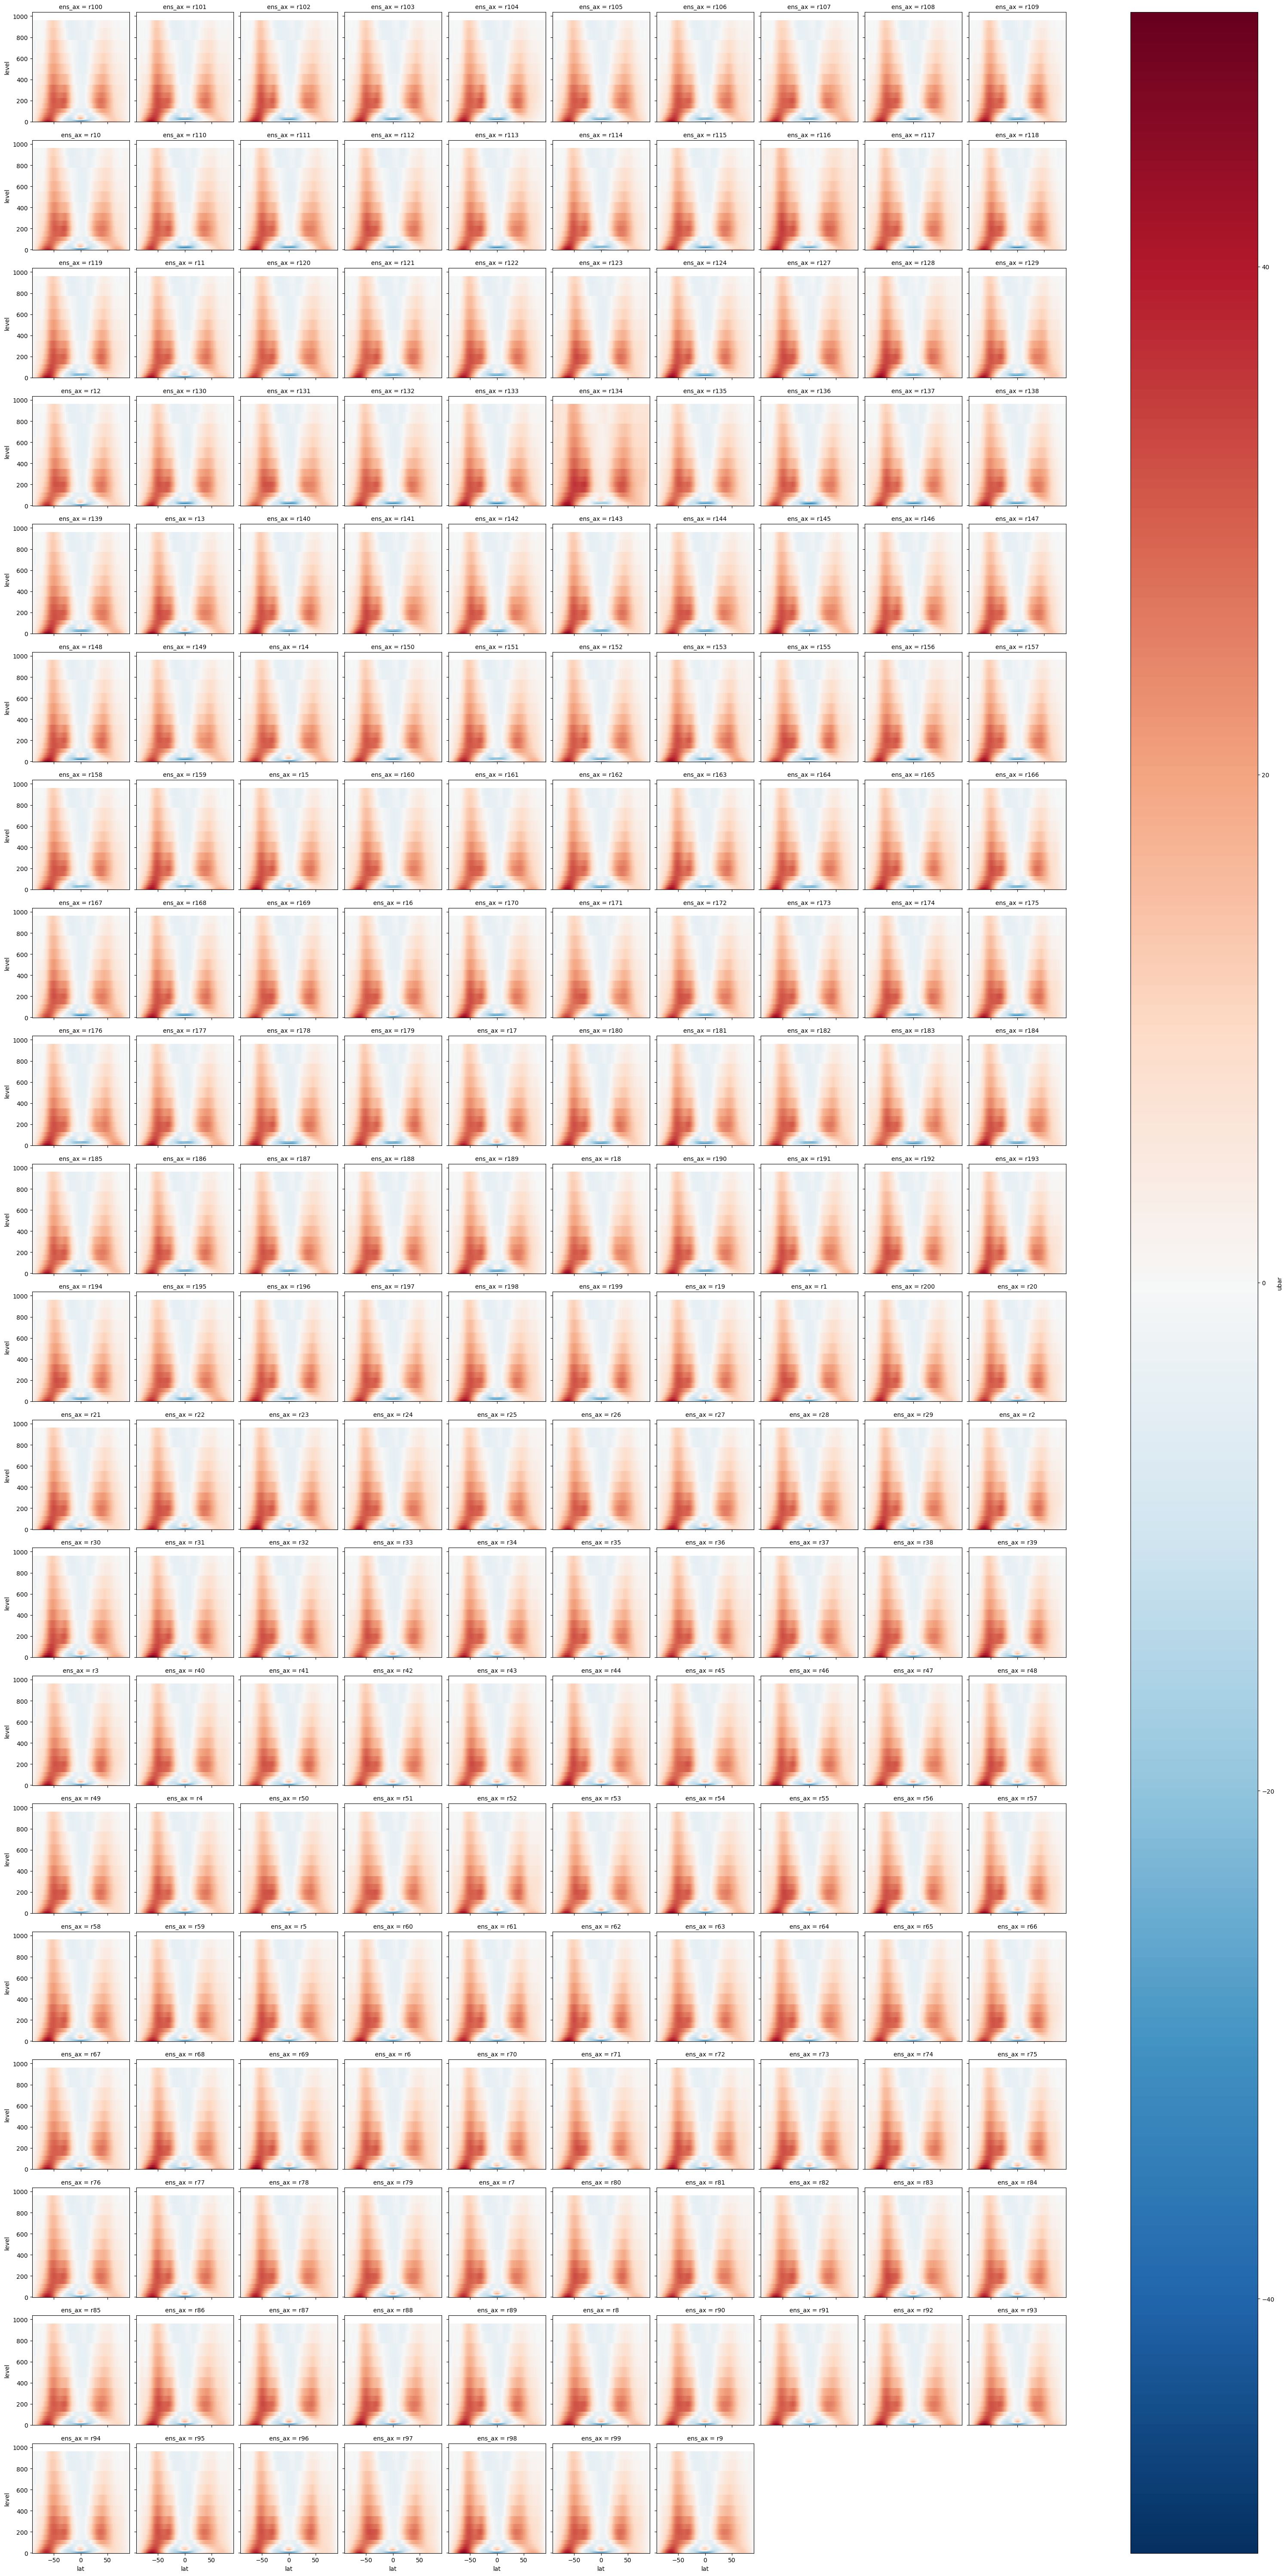

In [45]:
ds3.ubar.mean(dim='time').plot(col='ens_ax', col_wrap=10)